In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tarfile
import urllib.request
from pathlib import Path

In [38]:
def load_titanic_data():
    tarball_path = Path("datasets/titanic.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://homl.info/titanic.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as tarball_file:
            tarball_file.extractall(path="datasets")
    return pd.read_csv(Path("datasets/titanic/train.csv"))

In [39]:
titanic_data = load_titanic_data()

In [40]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
titanic_data.drop("PassengerId", axis=1, inplace=True)

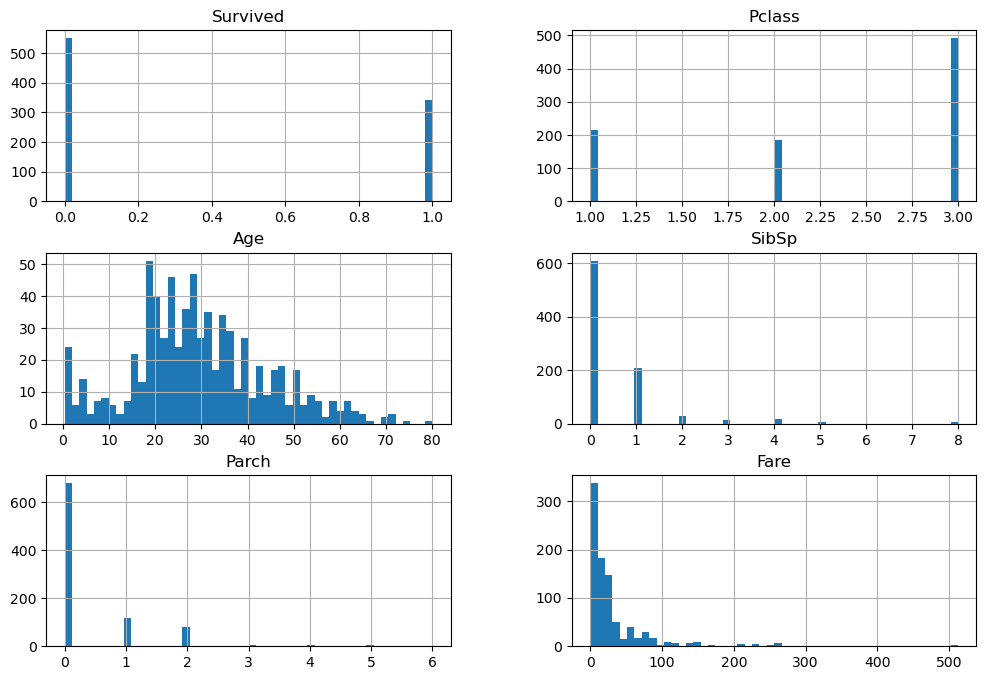

In [42]:
titanic_data.hist(bins=50, figsize=(12, 8))
plt.show()

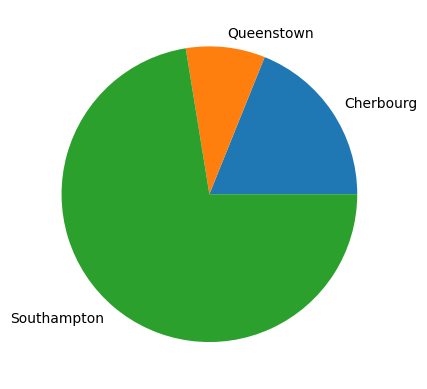

In [43]:
Cherbourg, Queenstown, Southampton = (titanic_data["Embarked"] == "C").sum(), (titanic_data["Embarked"] == "Q").sum(), (titanic_data["Embarked"] == "S").sum()
data = [Cherbourg, Queenstown, Southampton]
embarked = ["Cherbourg", "Queenstown", "Southampton"]
plt.pie(data, labels=embarked);

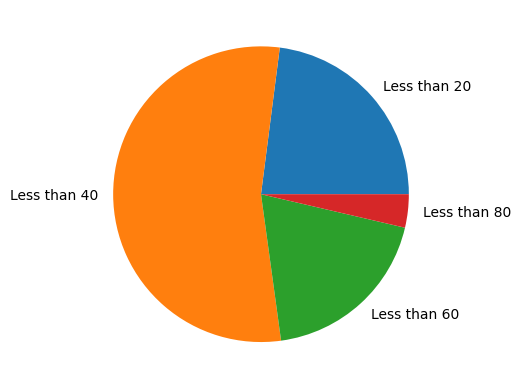

In [44]:
one, two, three, four = 0, 0, 0, 0
for age in titanic_data["Age"]:
    if age > 0 and age < 20:
        one += 1
    elif age >= 20 and age < 40:
        two += 1
    elif age >= 40 and age < 60:
        three += 1
    elif age >= 60 and age <= 80:
        four += 1
age_groups = ["Less than 20", "Less than 40", "Less than 60", "Less than 80"]
data = [one, two, three, four]
plt.pie(data, labels=age_groups);

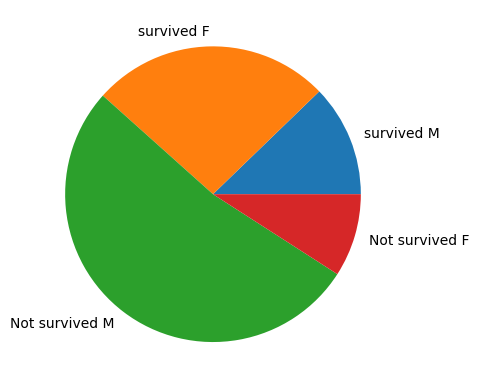

In [45]:
male_count, female_count, male, female = 109, 233, 468, 81
labels = ["survived M", "survived F", "Not survived M", "Not survived F"]
data = [male_count, female_count, male, female]
plt.pie(data, labels=labels);

In [46]:
titanic_num = titanic_data.select_dtypes(include=np.number)

In [47]:
corr_matrix = titanic_num.corr()

In [48]:
corr_matrix["Survived"].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
Name: Survived, dtype: float64

In [49]:
titanic_data[(titanic_data["Age"] > 0) & (titanic_data["Age"] <= 10) & (titanic_data["Survived"] == 1)].shape[0]

38

In [50]:
titanic_data[(titanic_data["Age"] > 0) & (titanic_data["Age"] <= 10) & (titanic_data["Survived"] == 0)].shape[0]

26

In [51]:
titanic_data[(titanic_data["Age"] > 0) & (titanic_data["Age"] <= 10)].shape[0]

64

In [52]:
def split_into_cat(dataset, empty_list):
    choice = 0
    for i in dataset["Name"]:
        name_list.append(i)
    for i in name_list:
        if "Mr." in i:
            pronoun = i.replace(i, "Mr.")
        elif "Mrs." in i:
            pronoun = i.replace(i, "Mrs.")
        elif "Miss." in i:
            pronoun = i.replace(i, "Miss.")
        else:
            if "Master." in i:
                pronoun = i.replace(i, "Master.")
        name_list[choice] = pronoun
        choice += 1

In [53]:
name_list = []
split_into_cat(titanic_data, name_list)
titanic_data["Name"] = name_list

In [54]:
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,Mr.,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,Mrs.,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,Miss.,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,Mrs.,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,Mr.,male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
titanic_data["Name"].value_counts().sum()

891

In [56]:
titanic_data.drop(columns=["Ticket", "Cabin"], axis=1, inplace=True)

In [57]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [58]:
(titanic_data["Age"].isnull() == True).sum()

177

In [59]:
median = titanic_data["Age"].median()
titanic_data["Age"].fillna(median, inplace=True)

In [60]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [61]:
from sklearn.impute import SimpleImputer

In [62]:
imputer = SimpleImputer(strategy="most_frequent")

In [63]:
titanic_embarked = titanic_data[["Embarked"]]

In [64]:
imputer.fit(titanic_embarked)

SimpleImputer(strategy='most_frequent')

In [65]:
add_embark = imputer.transform(titanic_embarked)

In [66]:
titanic_data[["Embarked"]] = add_embark

In [67]:
titanic_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,Mr.,male,22.0,1,0,7.2500,S
1,1,1,Mrs.,female,38.0,1,0,71.2833,C
2,1,3,Miss.,female,26.0,0,0,7.9250,S
3,1,1,Mrs.,female,35.0,1,0,53.1000,S
4,0,3,Mr.,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,Mrs.,male,27.0,0,0,13.0000,S
887,1,1,Miss.,female,19.0,0,0,30.0000,S
888,0,3,Miss.,female,28.0,1,2,23.4500,S
889,1,1,Mr.,male,26.0,0,0,30.0000,C


In [68]:
titanic_cat_columns = ["Name", "Sex", "Embarked"]

In [69]:
titanic_cat = titanic_data[titanic_cat_columns]

In [70]:
from sklearn.preprocessing import OneHotEncoder

In [71]:
one_hot = OneHotEncoder()

In [72]:
transformed_cat = one_hot.fit_transform(titanic_cat)

In [73]:
transformed_cat.toarray()

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [74]:
transformer_df = pd.DataFrame(transformed_cat.toarray(), columns=one_hot.get_feature_names_out(), index=titanic_cat.index)

In [75]:
transformer_df

,Name_Master.,Name_Miss.,Name_Mr.,Name_Mrs.,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
886,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
887,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
888,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
889,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [76]:
titanic_data.drop(columns=["Name", "Sex", "Embarked"], axis=1, inplace=True)

In [77]:
df_columns = transformer_df.columns

In [78]:
final_set = titanic_data.join(transformer_df[df_columns])

In [79]:
final_set

,Survived,Pclass,Age,SibSp,Parch,Fare,Name_Master.,Name_Miss.,Name_Mr.,Name_Mrs.,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
887,1,1,19.0,0,0,30.0000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
888,0,3,28.0,1,2,23.4500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
889,1,1,26.0,0,0,30.0000,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [80]:
train_labels = final_set["Survived"]

In [81]:
final_set.drop("Survived", axis=1, inplace=True)

In [82]:
train_label_1 = (train_labels == 1)

In [83]:
from sklearn.linear_model import SGDClassifier

In [84]:
sgd_clf = SGDClassifier(random_state=42)

In [85]:
sgd_clf.fit(final_set, train_label_1)

SGDClassifier(random_state=42)

In [86]:
test_set = final_set.iloc[2]

In [87]:
test_set

Pclass           3.000
Age             26.000
SibSp            0.000
Parch            0.000
Fare             7.925
Name_Master.     0.000
Name_Miss.       1.000
Name_Mr.         0.000
Name_Mrs.        0.000
Sex_female       1.000
Sex_male         0.000
Embarked_C       0.000
Embarked_Q       0.000
Embarked_S       1.000
Name: 2, dtype: float64

In [88]:
sgd_clf.predict([test_set])

D:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [89]:
train_labels[2]

1

In [90]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [91]:
train_pred = cross_val_predict(sgd_clf, final_set, train_labels, cv=3)

In [92]:
cm = confusion_matrix(train_labels, train_pred)

In [93]:
cm

array([[442, 107],
       [ 99, 243]], dtype=int64)

In [94]:
from sklearn.metrics import precision_score, recall_score

In [95]:
precision_score(train_labels, train_pred)

0.6942857142857143

In [96]:
recall_score(train_labels, train_pred)

0.7105263157894737

In [97]:
final_set

,Pclass,Age,SibSp,Parch,Fare,Name_Master.,Name_Miss.,Name_Mr.,Name_Mrs.,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1,38.0,1,0,71.2833,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,3,26.0,0,0,7.9250,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1,35.0,1,0,53.1000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,3,35.0,0,0,8.0500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
887,1,19.0,0,0,30.0000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
888,3,28.0,1,2,23.4500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
889,1,26.0,0,0,30.0000,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [280]:
# Custom Transformer

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class AgeImputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.with_median = True
        self.age_dict = {
            "Mr": 0,
            "Mrs": 0,
            "Miss": 0,
            "Master": 0,
        }
    
    def fit(self, X, y=None):
        self.columns = X.columns
        X = check_array(X)
        for i in range(X.shape[0]):
            if (X.iloc[i][8] == 1.0 and X.iloc[i][2] != 0.0):
                self.age_dict["Mr"].append(X.iloc[i][2])
            elif (X.iloc[i][9] == 1.0 and X.iloc[i][2] != 0.0):
                self.age_dict["Mrs"].append(X.iloc[i][2])
            elif (X.iloc[i][7] == 1.0 and X.iloc[i][2] != 0.0):
                self.age_dict["Miss"].append(X.iloc[i][2])
            elif (X.iloc[i][6] == 1.0 and X.iloc[i][2] != 0.0):
                self.age_dict["Master"].append(X.iloc[i][2])
        for i in age_dict:
            age_dict[i] = np.array([age_dict[i]])
        for i in age_dict:
            self.mr_median_ = np.median(i)
            self.mrs_median_ = np.median(i)
            self.miss_median_ = np.median(i)
            self.master_median_ = np.median(i)
        self.n_feature_in_ = X.shape[1]
        return self
    
    def transform(self, X):
        check_if_fitted(X)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        for i in range(X.shape[0]):
            if (X.iloc[i][9] == 1) and (X.iloc[i]["Age"] == 0):
                X.iloc[i][2] == self.mr_median_
            elif (X.iloc[i][10] == 1) and (X.iloc[i]["Age"] == 0):
                X.iloc[i][2] == self.mrs_median_
            elif (X.iloc[i][8] == 1) and (X.iloc[i]["Age"] == 0):
                X.iloc[i][2] == self.miss_median_
            else:
                X.iloc[i][2] == self.master_median_
        return X

In [99]:
# np.isnan(titanic_data.iloc[888]["Age"]) == True

In [117]:
titanic_set = load_titanic_data()

In [118]:
titanic_set["Name"] = name_list

In [120]:
titanic_set.drop(columns=["PassengerId", "Ticket", "Cabin"], axis=1, inplace=True)

In [122]:
titanic_set

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,Mr.,male,22.0,1,0,7.2500,S
1,1,1,Mrs.,female,38.0,1,0,71.2833,C
2,1,3,Miss.,female,26.0,0,0,7.9250,S
3,1,1,Mrs.,female,35.0,1,0,53.1000,S
4,0,3,Mr.,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,Mrs.,male,27.0,0,0,13.0000,S
887,1,1,Miss.,female,19.0,0,0,30.0000,S
888,0,3,Miss.,female,NaN,1,2,23.4500,S
889,1,1,Mr.,male,26.0,0,0,30.0000,C


In [123]:
from sklearn.preprocessing import OneHotEncoder

In [124]:
one_hot = OneHotEncoder()

In [125]:
columns = ["Name", "Sex", "Embarked"]

In [126]:
one_hot.fit(titanic_cat)

OneHotEncoder()

In [127]:
one_hot_mat = one_hot.transform(titanic_cat).toarray()

In [128]:
encoded_df = pd.DataFrame(one_hot_mat, columns=one_hot.get_feature_names_out(), index=titanic_cat.index)

In [129]:
encoded_df

,Name_Master.,Name_Miss.,Name_Mr.,Name_Mrs.,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
886,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
887,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
888,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
889,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [131]:
final_test_set = titanic_set.join(encoded_df)

In [133]:
final_test_set.drop(columns=["Name", "Sex", "Embarked"], axis=1, inplace=True)

In [134]:
final_test_set

,Survived,Pclass,Age,SibSp,Parch,Fare,Name_Master.,Name_Miss.,Name_Mr.,Name_Mrs.,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
887,1,1,19.0,0,0,30.0000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
888,0,3,NaN,1,2,23.4500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
889,1,1,26.0,0,0,30.0000,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [156]:
final_test_set["Age"] = final_test_set["Age"].fillna(0)

In [143]:
# final_test_set[final_test_set["Name_Master."] == 1]["Age"].median()

4.0

In [198]:
final_test_set.iloc[888]["Name_Miss."] == 1

True

In [278]:
age_imp = AgeImputer()

In [279]:
age_imp.fit(final_test_set)

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'